
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [312]:
#Load libraries
import numpy as np
import pandas as pd

In [313]:
#Load data in dataframe
df = pd.read_csv('train.csv')

In [314]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [316]:
df.shape

(891, 12)

In [317]:
#Find the average age of those who survived and those who did not
age_survive_yes = df.loc[df['Survived']==1,['Age']].mean()

In [318]:
print(f'The average age of those who survived is {age_survive_yes}')

The average age of those who survived is Age    28.34369
dtype: float64


In [319]:
age_survive_no = df.loc[df['Survived']==0,['Age']].mean()


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [320]:
#Your code here 
import missingno as msno


<AxesSubplot:>

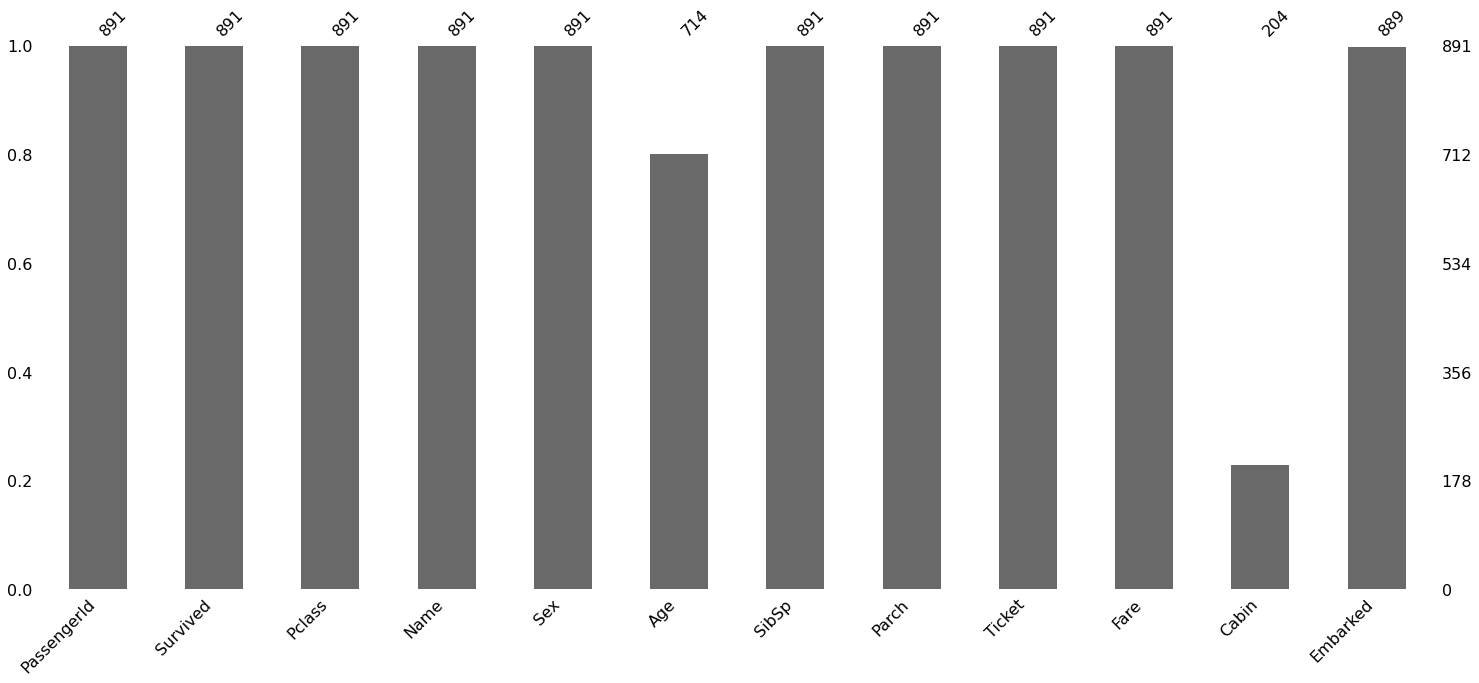

In [321]:
#Your code here
msno.bar(df) 

In [322]:
(df['Cabin'].isnull().sum())

687

The most empty column is in 'Cabin' column with 687 empty rows.

In [323]:
#Your code here 
df.dropna(subset='Embarked',axis=0,inplace=True) #to rows with empty embarked

In [324]:
#Your code here 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [325]:
#Your code here 
df['Cabin'] = df['Cabin'].fillna('¯\\_(ツ)_/¯')

In [326]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [376]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male,Title,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,1,1,0,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,0


In [374]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [329]:
def reverend_yes(x):
    if "Rev." in x:
        return 1
    else:
        return 0


In [330]:
df['IsReverend'] = df['Name'].apply(lambda x: reverend_yes(x))

In [331]:
df.loc[df['IsReverend'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\_(ツ)_/¯,S,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\_(ツ)_/¯,S,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\_(ツ)_/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\_(ツ)_/¯,Q,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\_(ツ)_/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\_(ツ)_/¯,S,1


In [332]:
#embarked_C embarked_Q embarked_S
df['Embark'] = df['Embarked']
df = pd.get_dummies(df,columns=['Embark'],prefix = "Embark")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,1


In [333]:
#sex using get dummies
df['sex'] = df['Sex']
df = pd.get_dummies(df,columns=['sex'],prefix = "",prefix_sep="")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,1,0,1


In [334]:
#extracting the title using refex for anything before .
import re

In [399]:
def title_gen(x):
    return (re.findall(f',(.+?\.)',x))

In [400]:
#Your code here 
df['Title'] = df['Name'].apply(lambda x: title_gen(x)[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male,Title,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,1,1,0,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [405]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male,Title,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,1,1,0,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,0


## 1. What was the survival rate overall?

In [452]:
survival_rate = df['Survived'].mean()*100
print('The survival_rate is %.2f' % survival_rate,'%')

The survival_rate is 38.25 %


# 2. Which gender fared the worst? What was their survival rate?

In [457]:
df.groupby(['male'])['Survived'].mean()


male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [455]:
df.groupby(['female'])['Survived'].mean()


female
0    0.188908
1    0.740385
Name: Survived, dtype: float64

Male has survival rate of 18.89% while female has 74.04% survival rate

# 3. What was the survival rate for each `Pclass`?

In [458]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

The survival rate for each class:
Class 1 - 62.62%
Class 2 - 47.28%
Class 3 - 24.24%

# 4. Did any reverends survive? How many?

In [460]:

df.groupby(['IsReverend'])['Survived'].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

None of the reverends survived.

# 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [463]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male,Title,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,1,1,0,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,1,0,1,Mr.,0


In [480]:
df.loc[df['Cabin']== '¯\_(ツ)_/¯']['Survived'].mean()*100

29.985443959243085

The survival rate for cabins marked as ¯\_(ツ)_/¯ is 29.96%

# 6. What is the survival rate for people whose `Age` is empty?


In [484]:
df[df['Age'].isnull()]['Survived'].mean()*100

29.37853107344633

The survival rate for people whose Age is empty is 29.38%

# 7. What is the survival rate for each port of embarkation?


In [498]:
df[df['Embark_S']==1]['Survived'].mean()

0.33695652173913043

In [499]:
df[df['Embark_C']==1]['Survived'].mean()

0.5535714285714286

In [500]:
df[df['Embark_Q']==1]['Survived'].mean()

0.38961038961038963

The survival rate for each port will be 33.70% for Southampton, 55.36% for Cherbourg, 38.96% for Queenstown

# 8. What is the survival rate for children (under 12) in each `Pclass`?

In [504]:
Pclass = [1,2,3]
for classes in Pclass:
    survival_children = df[(df['Age'] < 12) & (df['Pclass']==classes)]['Survived'].mean()*100
    print(f'Class {classes} has survival rate of {survival_children}')

Class 1 has survival rate of 75.0
Class 2 has survival rate of 100.0
Class 3 has survival rate of 40.42553191489361


# 9. Did the captain of the ship survive? Is he on the list?

In [520]:
df[df['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male,Title,FamilyCount
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,0,0,0,1,0,1,Capt.,2


Yes, the captain is on the list, but he did not survive

# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [531]:
df[df['Fare'] == (df[df['Survived']==0]['Fare'].max())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Embark_C,Embark_Q,Embark_S,female,male,Title,FamilyCount
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,0,0,0,1,0,1,Mr.,5
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,0,0,0,1,1,0,Miss.,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,0,0,0,1,1,0,Miss.,5
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,0,0,0,1,0,1,Mr.,5


Out of the ones that died, Mr Charles Alexander Fortune and Mr Mark Fortune had the most expensive ticket at $263

# 11. Does having family on the boat help or hurt your chances of survival?

<AxesSubplot:xlabel='FamilyCount'>

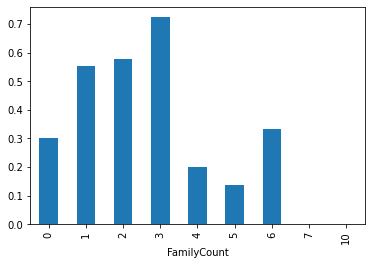

In [539]:
df.groupby('FamilyCount')['Survived'].mean().plot(kind='bar')

We can see potential help of survival rate in passager with Family Count less than 4

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [540]:
import matplotlib.pyplot as plt
import seaborn as sns

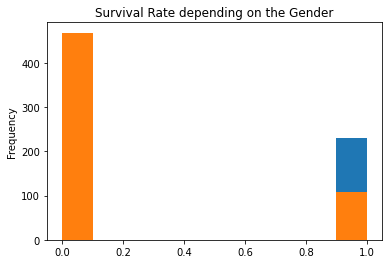

In [560]:
df.groupby('Sex')['Survived'].plot(kind='hist')
plt.title('Survival Rate depending on the Gender');


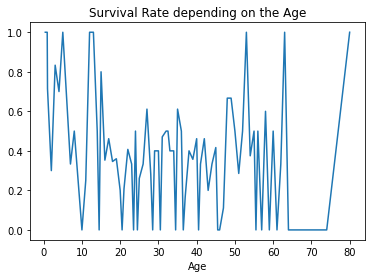

In [570]:
df.groupby('Age')['Survived'].mean().plot(kind='line')
plt.title('Survival Rate depending on the Age');

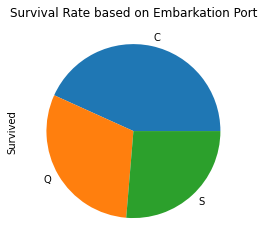

In [579]:
df.groupby('Embarked')['Survived'].mean().plot(kind='pie')
plt.title('Survival Rate based on Embarkation Port');
